# Statistical Exploration:
### Mental health referrals and their trends and tendencies between the years 2018-2022

In [2]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats
import statistics

In [3]:
# read in data

# mental health data, date manipulated
health_data = pd.read_csv('../../datasets/NHS_cleaned/NHS_manual_data_cleaned_reformat.csv')

# mental health data
mental_health_data = pd.read_csv('../../datasets/NHS_cleaned/NHS_manual_data_cleaned.csv')


In [47]:
#this cell is only used to look at data. The code here is commented out to prevent data dumping. 
#track_data['mood'].describe()
#mental_health_data.tail(30)

In [9]:
new_track_data = track_data.copy()
new_track_data['date'] = pd.to_datetime(new_track_data['date'])
#new_track_data

## Visualizing the mental health data

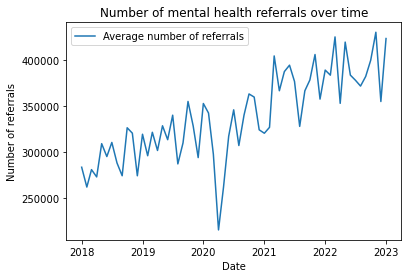

In [55]:
plt.plot(mental_health_data['month'],mental_health_data['no_of_referrals'], label="Average number of referrals")
plt.legend()

plt.ylabel('Number of referrals')
plt.xlabel('Date')
plt.title('Number of mental health referrals over time')

plt.show()

Here we note: 
- General upwards trajectory in mental health referrals 
- Valley in 2020(March) is assumed to be because of pandemic measures causing lack of access to mental health services, not because of improvement in mental health of the UK population as a whole.
- Relatively large spike in number of mental health referrals between January 2021 and March 2021- This aligns with the duration of the third lock down. 
- 2021 July to August shows a sudden dip in number of referrals- this aligns with the relaxation of pandemic related restrictions, but this number spikes shortly after in the two months that follow, suggesting that adjustment to post-pandemic routines may have been difficult for many. 

## Comparing average number of referrals over the pre-pandemic, pandemic, and post_pandemic periods:

In [36]:
#to be able to use date_time to filter mental health data
mental_health_data['month'] = pd.to_datetime(mental_health_data['month'])

#average referrals for the pre-pandemic period:
mh_df_pre_pandemic = mental_health_data[(mental_health_data.month < '2020-03-20')]

round(statistics.mean(mh_df_pre_pandemic['no_of_referrals']),2)

306656.63

In [38]:
#average referrals for pandemic period:
mh_df_pandemic = mental_health_data[(mental_health_data.month >= '2020-03-20') & (mental_health_data.month <= '2021-07-16')]

round(statistics.mean(mh_df_pandemic['no_of_referrals']),2)

338107.69

In [45]:
# average referrals for post-pandemic period excludind 2023, 
# because 2023 data is not complete and january is a high referral month, which will skew the mean
mh_df_post_pandemic = mental_health_data[(mental_health_data.month >= '2021-07-16')]

round(statistics.mean(mh_df_post_pandemic['no_of_referrals']),2)

385051.5

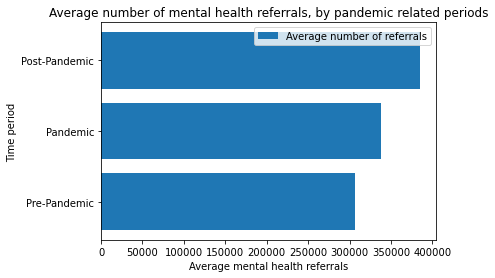

In [46]:
#plot using above information

plt.barh(["Pre-Pandemic","Pandemic","Post-Pandemic"],
[306656,338107,385051], align='center', label="Average number of referrals")
plt.legend()

plt.ylabel('Time period')
plt.xlabel('Average mental health referrals')
plt.title('Average number of mental health referrals, by pandemic related periods')

plt.show()

Filtering the mental health referrals by periods of time classified as pre-pandemic, pandemic and post pandemic show the above trend in average amount of mental health referrals. The pre-pandemic period has the lowest average number of referrals followed by the pandemic period, and the post-pandemic period. Before exploring the data set, it was expected that the average number of referrals would be highest for the pandemic period, and that the post-pandemic period would show a promising decline in the average number of referrals. It should be noted that not all periods have the same number of data entries, but this method of dividing up the periods is the best method of looking at the UK's mental health in relation to the pre-pandemic, pandemic and post-pandemic period. 

In [49]:
#looking at stats in the date manipulated mental health dataset (health_data)  

#average referrals per year
annual_avg_referrals = health_data.groupby('year')['no_of_referrals'].mean().round(2)
annual_avg_referrals

year
2018    291204.00
2019    316064.83
2020    318785.67
2021    367750.75
2022    389266.17
2023    423522.00
Name: no_of_referrals, dtype: float64

Here we can see that the most drastic increase in the average number of referrals in consecutive years was between the year 2020 and 2021. Above overall trend plot shows the cause for these sudden spikes more clearly. It has to do with pandemic measures and regulations being announced and access to mental health services.

In [23]:
#minimum referrals recorded each year
health_data.groupby('year')['no_of_referrals'].min().round(2)

year
2018    261609
2019    286850
2020    214893
2021    320277
2022    352866
2023    423522
Name: no_of_referrals, dtype: int64

In [16]:
#maximum number of referrals recorded each year
health_data.groupby('year')['no_of_referrals'].max().round(2)

year
2018    326248
2019    354938
2020    363112
2021    406095
2022    430373
2023    423522
Name: no_of_referrals, dtype: int64

-----------------------------------------------------------------------------------